# Tutorial for NIRCam post-pipeline contrast analyses using spaceKLIP

In this notebook we will analyze the NIRCam coronagraphy data on HIP 65426 b 
from the JWST ERS program on Direct Observations of Exoplanetary Systems, program 1386. 


<!-- <div class="alert alert-block alert-warning">
<b>Prerequisite:</b> This notebook assumes you have already ran the "Tutorial for NIRCam data reductions" notebook. The output files  must be present from that reduction to be analyzed in this notebook.

</div> -->

## Setup and imports

In [1]:
import os
import pdb
import sys
import glob

import numpy as np
import astropy.io.fits as fits
import astropy.table

import matplotlib.pyplot as plt
import matplotlib

import spaceKLIP

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 CANNOT BE CHECKED AGAINST ONLINE VERSION


Note that currently the import of `webbpsf_ext` has a side effect of configuring extra verbose logging. We're not interested in that logging text, so let's quiet it. 

In [2]:
import webbpsf_ext
webbpsf_ext.setup_logging('WARN', verbose=False)

In [3]:
idir = '/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/'
odir = idir+'spaceklip/'

## Re-read level 3 outputs into database 
Read in output files produced in the NIRCam coronagraph data reduction notebook. 

In [4]:
fitsfiles = sorted([idir + f for f in os.listdir(idir)
                if f.endswith('.fits')])


# Initialize spaceKLIP database.
database = spaceKLIP.database.Database(output_dir=odir)

# Read FITS files.
database.read_jwst_s012_data(datapaths=fitsfiles,
                                bgpaths=None)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... BUNIT       ROLL_REF      BLURFWHM
---- --------- -------- -------- ... ------ ------------------ --------
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr 284.81837368750297      nan
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr 279.81907905732885      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 282.51312949954837      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 282.51313034376915      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 282.51313134434986      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 282.51313294761457      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 282.51313649738125      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  282.5131343376724      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 282.51312778918776      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr

In [5]:
ImageTools = spaceKLIP.imagetools.ImageTools(database=database)
ImageTools.crop_frames(npix=80,
                           types=['SCI', 'SCI_BG', 'REF', 'REF_BG'],
                           subdir='cropped')

ImageTools.align_frames(method='fourier',
                        kwargs={},
                        subdir='aligned')

# Coadd frames.
ImageTools.coadd_frames(nframes=None,
                        types=['SCI', 'REF'],
                        subdir='coadded')

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw01386117001_03107_00001_nrcalong_calints_mstar_subtracted_disk_subtracted.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (160, 160)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw01386118001_03107_00001_nrcalong_calints_mstar_subtracted_disk_subtracted.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (160, 160)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw01386116001_03108_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (160, 160)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw01386116001_03108_00002_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (160, 160)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw

In [6]:
kwargs = {'mode': ['RDI','ADI+RDI','ADI'],
              'annuli': [1,5,20],
              'subsections': [1,4,6],
              'numbasis': [1, 5, 10, 20],
              'highpass': 3,
              'OWA': 80,
              'algo': 'klip',}
klip_dir = 'klipsub_final_240221'
spaceKLIP.pyklippipeline.run_obs(database=database,
                        kwargs=kwargs,
                        subdir=klip_dir,)

[spaceKLIP.pyklippipeline:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = RDI, annuli = 1, subsections = 1
Begin align and scale images for each wavelength
Wavelength 3.63 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1
Closing threadpool
Derotating Images...
Writing Images to directory /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221
wavelength collapsing reduced data of shape (b, N, wv, y, x):(4, 2, 1, 160, 160)
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Reje

## Contrast Calculations

Here we use the analysistools module to measure contrast

### Preparation: Stellar Photometry Model

A model of the target star is needed to compute its flux in the observational filters, and thereby produce a reference point from which to determine our contrast performance. This requires an input that gives either **(a)** the host star photometry, formatted as a [Vizier](http://vizier.cds.unistra.fr) VOTable, or **(b)** a simple text file with two columns giving wavelenth in microns and flux in Jy.


If you need to obtain you own version of option **(a)**, head to Vizier's [Photometry Viewer](http://vizier.cds.unistra.fr/vizier/sed/) and input your target of interest. However, exercise caution as this search can introduce spurious photometry measurements from nearby sources, which are realised as sharp variations in flux that do not agree with the expected profile of the targets spectral energy distribution. You may need to clean the obtained data by reducing the search radius, or manually removing individual points using the checkboxes in the table at the bottom. Once you are happy, click \"Download Data\" to obtain a VOTable that can be directly ingested into spaceKLIP. Option **(b)** could be instead be produced, for instance, from fitting a scaled version of a stellar atmosphere model to available photometry.

We provide here examples of both kinds of file, provided by Aarynn Carter. _Only one is needed; we provide both purely as examples._

In [7]:
fitsfiles = sorted(glob.glob(os.path.join(odir, klip_dir,"*KLmodes-all.fits")))

Database = spaceKLIP.database.Database(output_dir=odir)
Database.read_jwst_s3_data(fitsfiles)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS  KLMODES  BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- --------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   ST

In [8]:
star_photometry_vot = 'hd_141569.vot'

In [9]:
import astropy

# Read in VOT version
vot_version = astropy.table.Table.read(star_photometry_vot)

# convert from freq to wl, just for plotting below.
vot_version['wavelength'] = (astropy.constants.c /  vot_version['sed_freq']).to(astropy.units.micron)

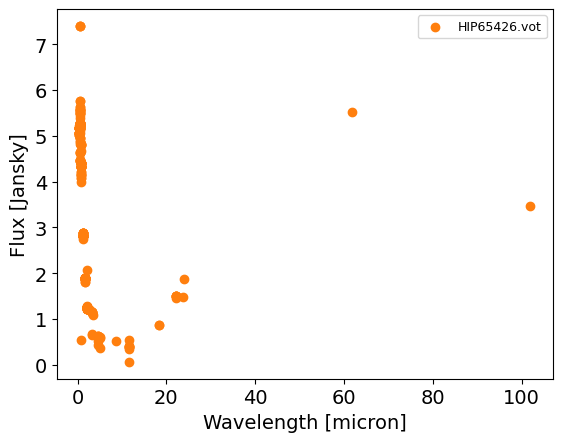

In [10]:
# plot, to show the two models are consistent

# plt.semilogx(txt_version['wavelength'], txt_version['flux'], label='HIP65426A_sdf_phoenix_m+modbb_disk_r.txt',)
plt.scatter(vot_version['wavelength'], vot_version['sed_flux'], label='HIP65426.vot', color='C1')

plt.xlabel("Wavelength [micron]")
plt.ylabel("Flux [Jansky]")
plt.legend(fontsize=9)
plt.show()


## Set up Analysis Tools

We initialize the AnalysisTools class and provide it the database of files to be analyzed. 

In [11]:
# Initialize the spaceKLIP contrast estimation class.
analysistools = spaceKLIP.analysistools.AnalysisTools(Database)


## Compute Raw Contrasts

This iterates over all filters and datasets.

In [12]:
# Compute raw contrast.
contrast_subdir = os.path.join("contrast_curves","rawcon")
analysistools.raw_contrast(starfile='hd_141569.vot',
                               spectral_type='A2V',
                               subdir = contrast_subdir)


[spaceKLIP.analysistools:INFO] Copying starfile hd_141569.vot to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/hd_141569.vot
[spaceKLIP.analysistools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI+RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/ADI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[spaceKLIP.analysistools:WARNING] No mask file provided; MASKFILE is None. This may cause problems!!


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
Contrast results and plots saved to /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/contrast_curves/rawcon/RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy


The output of these is a large set of files within the `rawcon` subdir of the data directory. This includes PDFs showing the reduced images, and plots of contrast, and also saved contrast curves. 

Previously, raw contrast curves were saved as `.npy` numpy data dump files; now they are saved as astropy ECSV format text files, for easy use with astropy.table. 

In [13]:
# astropy.table.Table.read(input_dir+'/contrast_curves/rawcon/ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_contrast.ecsv')

In [14]:
fitsfiles = sorted(glob.glob(os.path.join(odir, klip_dir,"*KLmodes-all.fits")))

database = spaceKLIP.database.Database(output_dir=odir)
database.read_jwst_s3_data(fitsfiles)
analysistools = spaceKLIP.analysistools.AnalysisTools(database)

#Compute calibrated contrast.
analysistools.calibrate_contrast(rawcon_subdir=os.path.join(odir+contrast_subdir), #Directory raw contrast was saved to
                                #  companions=[[comp_dra, comp_ddec, 2.]],  #[RA offset (arcsec), Dec offset (arcsec), mask radius (lambda/D)] for companions to avoid injecting too close
                                 injection_seps=[0.5, 1, 2, 3], # Separations to inject and recover companions (arcsec), can also be 'default'
                                 injection_pas=[45], # PAs to inject and recover companions (degrees), can also be 'default'
                                 injection_flux_sigma=20, #N sigma flux of injected companion relative to contrast of median KL mode subtraction (default 20)
                                 multi_injection_spacing=None, #Spacing between injected companion, None = 1 companion per injection+recovery.
                                 use_saved=False,
                                 highpass=kwargs['highpass']) # whether to run the companion injection, or load saved files.


[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS  KLMODES  BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- --------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   ST

[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI+RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/ADI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU1_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU1_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU20_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU5_NSUBS1_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU5_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file /home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/RDI_NANNU5_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
--> Rejected 0 of 2 images due to too many bad pixels (threshold = 100%)
--> Rejected 0 of 9 images due to too many bad pixels (threshold = 100%)
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 4 source positions suitable for injection.


  0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
kwargs['highpass']

3